In [1]:
import numpy as np
import pandas as pd
# a feature tranformer  , help to capture complex patterns
# approximates radial basis function
# map input features into a higher-dimensional space
from sklearn.kernel_approximation import RBFSampler
# large-scale dataset usable linear classifier
# Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import(roc_curve, classification_report,auc)
from sklearn.preprocessing import LabelEncoder, StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
print("Train Data Sample:\n", traindata[:5])  # 打印前五行
print("Test Data Sample:\n", testdata[:5]) 

In [5]:
data=pd.read_csv('KDDTrain+.txt',header=None)
X = data.iloc[:,:41].join(data.iloc[:, 42:])
Y = data.iloc[:,41]

# 划分训练集和测试集（80% 训练，20% 测试）
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# 输出划分后的数据集形状
print("训练集特征形状:", X_train.shape)
print("测试集特征形状:", X_test.shape)
print("训练集标签形状:", y_train.shape)
print("测试集标签形状:", y_test.shape)

训练集特征形状: (100778, 42)
测试集特征形状: (25195, 42)
训练集标签形状: (100778,)
测试集标签形状: (25195,)


In [6]:

from sklearn.preprocessing import LabelEncoder

# ENCODER
# 创建 LabelEncoder 实例
label_encoders = {}
for column in [1, 2, 3]:  # 需要编码的列索引
    if column in X_train.columns:
        # 处理字符串（去空格、转小写）
        X_train[column] = X_train[column].str.strip().str.lower()
        X_test[column] = X_test[column].str.strip().str.lower()

        le = LabelEncoder()
        # 对训练数据进行编码
        X_train[column] = le.fit_transform(X_train[column])
        label_encoders[column] = le  # 存储编码器

        # 对测试数据进行相同的编码，处理未知标签
        X_test[column] = X_test[column].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# 对标签进行编码
label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)  # 对训练标签进行编码
y_test_encoded = label_encoder_y.transform(y_test)  # 对测试标签进行编码


# 特征标准化
scaler = StandardScaler().fit(X_train)  # 采用标准化
trainX = scaler.transform(X_train)
testX = scaler.transform(X_test)

# 转换为 NumPy 数组
traindata = np.array(trainX)
trainlabel = np.array(y_train_encoded)

testdata = np.array(testX)
testlabel = np.array(y_test_encoded)

# 输出查看
print("训练集特征形状:", traindata.shape)
print("训练集标签形状:", trainlabel.shape)
print("测试集特征形状:", testdata.shape)
print("测试集标签形状:", testlabel.shape)

print("训练标签编码:", trainlabel)
print("测试标签编码:", testlabel)

训练集特征形状: (100778, 42)
训练集标签形状: (100778,)
测试集特征形状: (25195, 42)
测试集标签形状: (25195,)
训练标签编码: [ 9 11 11 ... 11 11 11]
测试标签编码: [ 5 11 17 ... 11  9  9]


--------------------------------------RF--------------------------------------
----------------------------------------------
accuracy
0.999
precision
0.999
racall
0.999
f1score
0.999


<Figure size 800x600 with 0 Axes>

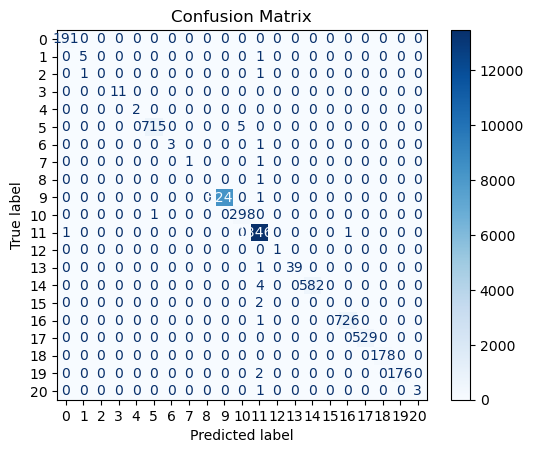

In [11]:
print("--------------------------------------RF--------------------------------------")
model = RandomForestClassifier(n_estimators=100)
model = model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
predicted = model.predict(testdata)
proba = model.predict_proba(testdata)
np.savetxt('classical/predictedlabelRF.txt', predicted, fmt='%01d')
np.savetxt('classical/predictedprobaRF.txt', proba)

# summarize the fit of the model
y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="micro")
precision = precision_score(y_train1, y_pred , average="micro")
f1 = f1_score(y_train1, y_pred, average="micro")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

cm = confusion_matrix(y_train1, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



In [23]:
# 将编码的预测标签转换回原始字符串
predicted_labels = label_encoder_y.inverse_transform(predicted)

# 输出分类报告
print("\nClassification Report:")
print(classification_report(y_test_encoded, predicted, target_names=label_encoder_y.classes_))

# 计算混淆矩阵
cm = confusion_matrix(y_test_encoded, predicted)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder_y.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Classification Report:


ValueError: Number of classes, 21, does not match size of target_names, 23. Try specifying the labels parameter

In [24]:
# 检查类别数量
print("Unique classes in y_test_encoded:", np.unique(y_test_encoded))
print("Unique classes in predicted:", np.unique(predicted))

Unique classes in y_test_encoded: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 20 21 22]
Unique classes in predicted: [ 0  1  3  4  5  6  7  9 10 11 13 14 15 17 18 20 21 22]


--------------------------------------RF macro--------------------------------------


ValueError: Found input variables with inconsistent numbers of samples: [100778, 25195]

In [13]:
print("--------------------------------------SVM linear--------------------------------------")
y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="micro")
precision = precision_score(y_train1, y_pred , average="micro")
f1 = f1_score(y_train1, y_pred, average="micro")

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)





--------------------------------------SVM linear--------------------------------------
accuracy
0.998
precision
0.998
racall
0.998
f1score
0.998


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np

# 定义 SVM 模型
model = svm.SVC(kernel='linear', C=1000, probability=True)

# 训练模型
model.fit(traindata, trainlabel)

# 打印模型信息
print(model)

# 对测试数据进行预测
predicted = model.predict(testdata)
proba = model.predict_proba(testdata)

# 评估模型性能
accuracy = accuracy_score(testlabel, predicted)  # 使用 testlabel 作为真实标签
recall = recall_score(testlabel, predicted, average="micro")
precision = precision_score(testlabel, predicted, average="micro")
f1 = f1_score(testlabel, predicted, average="micro")

# 打印评估结果
print("accuracy: %.3f" % accuracy)
print("precision: %.3f" % precision)
print("recall: %.3f" % recall)
print("f1 score: %.3f" % f1)

# 保存预测结果和概率
np.savetxt('classical/predictedlabelSVM-linear.txt', predicted, fmt='%01d')
np.savetxt('classical/predictedprobaSVM-linear.txt', proba)

# 总结模型拟合情况
print("模型拟合完成，预测标签和概率已保存。")

In [4]:

model = AdaBoostClassifier(n_estimators=100)
model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
predicted = model.predict(testdata)
proba = model.predict_proba(testdata)

np.savetxt('classical/predictedlabelAB.txt', predicted, fmt='%01d')
np.savetxt('classical/predictedprobaAB.txt', proba)
# summarize the fit of the model

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="micro")
precision = precision_score(y_train1, y_pred , average="micro")
f1 = f1_score(y_train1, y_pred, average="micro")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

model = RandomForestClassifier(n_estimators=100)
model = model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
predicted = model.predict(testdata)
proba = model.predict_proba(testdata)
np.savetxt('classical/predictedlabelRF.txt', predicted, fmt='%01d')
np.savetxt('classical/predictedprobaRF.txt', proba)

# summarize the fit of the model

----------------------------------------------
accuracy
0.848
precision
0.848
racall
0.848
f1score
0.848


In [5]:
import os
if not os.path.exists('classical'):
    os.makedirs('classical')
print("-----------------------------------------LR---------------------------------")
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(traindata, trainlabel)

# make predictions
expected = testlabel
np.savetxt('classical/expected.txt', expected, fmt='%01d')
predicted = model.predict(testdata)
proba = model.predict_proba(testdata)

np.savetxt('classical/predictedlabelLR.txt', predicted, fmt='%01d')
np.savetxt('classical/predictedprobaLR.txt', proba)

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="micro")
precision = precision_score(y_train1, y_pred , average="micro")
f1 = f1_score(y_train1, y_pred, average="micro")

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)


-----------------------------------------LR---------------------------------


c:\Users\zhaoyansijie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy
0.992
precision
0.992
racall
0.992
f1score
0.992


In [4]:
print("-----------------------------------------KNN---------------------------------")
model = KNeighborsClassifier()
model.fit(traindata, trainlabel)
print(model)
# make predictions
expected = testlabel
predicted = model.predict(testdata)
proba = model.predict_proba(testdata)


np.savetxt('classical/predictedlabelKNN.txt', predicted, fmt='%01d')
np.savetxt('classical/predictedprobaKNN.txt', proba)

# summarize the fit of the model

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="micro")
precision = precision_score(y_train1, y_pred , average="micro")
f1 = f1_score(y_train1, y_pred, average="micro")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)


-----------------------------------------KNN---------------------------------
KNeighborsClassifier()
----------------------------------------------
accuracy
0.998
precision
0.998
racall
0.998
f1score
0.998


In [174]:
#数据分布不平衡
from collections import Counter
print(Counter(trainlabel))

Counter({11: 67343, 9: 41214, 17: 3633, 5: 3599, 15: 2931, 18: 2646, 10: 1493, 0: 956, 20: 892, 21: 890, 14: 201, 3: 53, 1: 30, 22: 20, 6: 18, 4: 11, 16: 10, 7: 9, 2: 8, 8: 7, 13: 4, 12: 3, 19: 2})


In [9]:
print("-----------------------------------------DT---------------------------------")

model = DecisionTreeClassifier()
model.fit(traindata, trainlabel)
print(model)
# make predictions
expected = testlabel
predicted = model.predict(testdata)
proba = model.predict_proba(testdata)

np.savetxt('classical/predictedlabelDT.txt', predicted, fmt='%01d')
np.savetxt('classical/predictedprobaDT.txt', proba)
# summarize the fit of the model

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="micro")
precision = precision_score(y_train1, y_pred , average="micro")
f1 = f1_score(y_train1, y_pred, average="micro")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)



-----------------------------------------DT---------------------------------
DecisionTreeClassifier()
----------------------------------------------
accuracy
0.998
precision
0.998
racall
0.998
f1score
0.998


In [6]:
# fit a Naive Bayes model to the data
print("-----------------------------------------NB---------------------------------")
model = GaussianNB()
model.fit(traindata, trainlabel)
print(model)
# make predictions
expected = testlabel
predicted = model.predict(testdata)
proba = model.predict_proba(testdata)

np.savetxt('classical/predictedlabelNB.txt', predicted, fmt='%01d')
np.savetxt('classical/predictedprobaNB.txt', proba)

y_train1 = expected
y_pred = predicted
accuracy = accuracy_score(y_train1, y_pred)
recall = recall_score(y_train1, y_pred , average="micro")
precision = precision_score(y_train1, y_pred , average="micro")
f1 = f1_score(y_train1, y_pred, average="micro")

print("accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" %precision)
print("racall")
print("%.3f" %recall)
print("f1score")
print("%.3f" %f1)

-----------------------------------------NB---------------------------------
GaussianNB()
accuracy
0.528
precision
0.528
racall
0.528
f1score
0.528


In [159]:
print(traindata.head(10))
print(testdata.head(10))

   0   1   2   3    4     5   6   7   8   9   ...    33    34    35    36  \
0   0   1  20   9  491     0   0   0   0   0  ...  0.17  0.03  0.17  0.00   
1   0   2  44   9  146     0   0   0   0   0  ...  0.00  0.60  0.88  0.00   
2   0   1  49   5    0     0   0   0   0   0  ...  0.10  0.05  0.00  0.00   
3   0   1  24   9  232  8153   0   0   0   0  ...  1.00  0.00  0.03  0.04   
4   0   1  24   9  199   420   0   0   0   0  ...  1.00  0.00  0.00  0.00   
5   0   1  49   1    0     0   0   0   0   0  ...  0.07  0.07  0.00  0.00   
6   0   1  49   5    0     0   0   0   0   0  ...  0.04  0.05  0.00  0.00   
7   0   1  49   5    0     0   0   0   0   0  ...  0.06  0.07  0.00  0.00   
8   0   1  51   5    0     0   0   0   0   0  ...  0.09  0.05  0.00  0.00   
9   0   1  49   5    0     0   0   0   0   0  ...  0.05  0.06  0.00  0.00   

     37    38    39    40  41  42  
0  0.00  0.00  0.05  0.00  11  20  
1  0.00  0.00  0.00  0.00  11  15  
2  1.00  1.00  0.00  0.00   9  19  
3  0.03 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


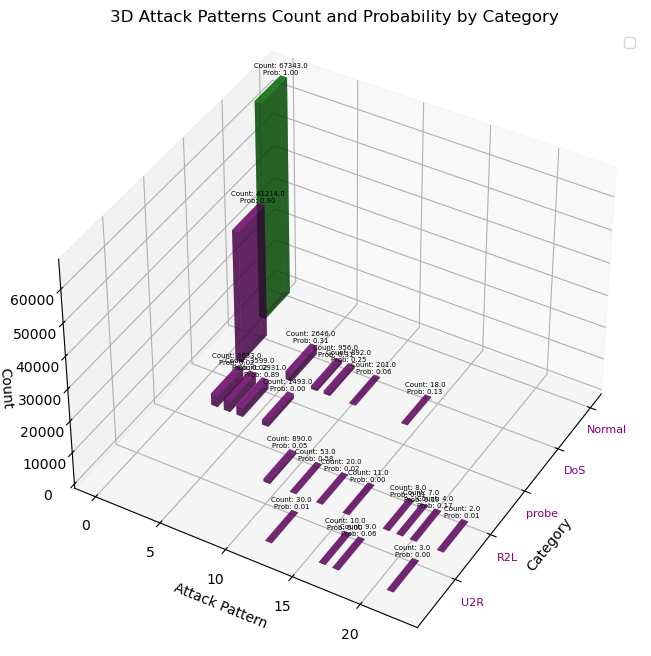

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
data = pd.read_csv('category_AttackPattern_analysis.csv')

# 确保 Count 列是数值类型
data['Count'] = pd.to_numeric(data['Count'], errors='coerce')

# 确保数据转换成功
data = data.dropna(subset=['Count'])

# 计算概率
data['Probability'] = data['Count'] / data.groupby('Category')['Count'].transform('sum')

# 准备3D数据
categories = data['Category'].unique()
AttackPatterns = data['AttackPattern'].unique()
xpos = []
ypos = []
dz = []
colors = []

# 为每个分类设置位置
for i, category in enumerate(categories):
    cat_data = data[data['Category'] == category]
    xpos.extend([i] * len(cat_data))  # X轴位置使用当前大分类的索引
    ypos.extend(cat_data['AttackPattern'].values)  # Y轴位置使用小分类名称
    dz.extend(cat_data['Count'].values)  # Z轴高度使用计数值
    
    # 为颜色列表添加颜色
    for pattern in cat_data['AttackPattern']:
        if pattern == 'normal':
            colors.append('green')  # normal 用绿色
        else:
            colors.append('purple')  # 其他类别用紫色

# 为ypos创建索引
ypos_index = {pattern: idx for idx, pattern in enumerate(AttackPatterns)}
ypos = [ypos_index[pattern] for pattern in ypos]

# 绘制3D柱状图
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制柱状图
ax.bar3d(xpos, ypos, np.zeros(len(dz)), [0.7]*len(dz), [0.5]*len(dz), dz, alpha=0.6, color=colors)

# 设置轴标签
ax.set_xlabel('Category')
ax.set_ylabel('Attack Pattern')
ax.set_zlabel('Count')
ax.set_title('3D Attack Patterns Count and Probability by Category')

# 设置X轴刻度标签
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, fontsize=8, color='purple')

# 在每个柱子上显示计数和概率
for x, y, count, prob in zip(xpos, ypos, dz, data['Probability']):
    name = AttackPatterns[y]  # 获取小分类名称
    ax.text(x, y, count + 0.5, f'Count: {count}\nProb: {prob:.2f}', fontsize=5, ha='center', va='bottom')

ax.view_init(elev=40, azim=30)
ax.legend()
plt.show()

In [23]:
#analysis category data--Chi-squared &(p-value)

data = pd.read_csv('category_AttackPattern_analysis.csv')

from scipy.stats import chi2_contingency

# 创建列联表
contingency_table = pd.crosstab(data['Category'], data['AttackPattern'])

# 进行卡方检验
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")

Chi-squared: 96.00000000000003, p-value: 0.36703636019412356


In [24]:
#attack category table

attackdata=pd.read_csv('AttackPattern_analysis.csv',header=None,names=['AttackPattern', 'Count', 'Probability'])
#

categories = {
    'probe': ['satan', 'mscan','portsweep', 'saint','nmap', 'ipsweep'],
    'R2L': ['xlock','snmpguess','warezclient','senmail','guess_password','warezmaster','snmpgetattack','httptunnel','named','spy', 'phf', 'multihop', 'imap', 'guess_passwd', 'ftp_write'],
    'U2R': ['rootkit','ps','sqlattack','xterm', 'perl', 'loadmodule', 'buffer_overflow'],
    'DoS': ['back','pod','smurf','teardrop','processtable','land','neptune','worm','apache2','udpstorm'],
    'Normal':['normal']}
attackdata['Category']='DoS'

for category, patterns in categories.items():
    attackdata.loc[attackdata['AttackPattern'].isin(patterns), 'Category'] = category
print(attackdata[['AttackPattern', 'Count', 'Probability', 'Category']])



      AttackPattern  Count             Probability Category
0     AttackPattern  Count             Probability      DoS
1            normal  67343      0.5345828074269883   Normal
2           neptune  41214     0.32716534495487126      DoS
3             satan   3633    0.028839513229025268    probe
4           ipsweep   3599    0.028569614123661418    probe
5         portsweep   2931     0.02326689052415994    probe
6             smurf   2646     0.02100450096449239      DoS
7              nmap   1493    0.011851746009065434    probe
8              back    956   0.0075889277861128975      DoS
9          teardrop    892     0.00708088241131036      DoS
10      warezclient    890    0.007065005993347781      R2L
11              pod    201    0.001595580005239218      DoS
12     guess_passwd     53    0.000420725076008351      R2L
13  buffer_overflow     30  0.00023814626943868925      U2R
14      warezmaster     20  0.00015876417962579282      R2L
15             land     18  0.0001428877

In [25]:
attackdata.to_csv('category_AttackPattern_analysis.csv', index=False)